In [1]:
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz, process
from pyara.saphana import SAPHANAConnector

C:\Users\a843931\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


   CREATE UNIQUE INDEX emp_emp_id_pk
         ON "A843931"."EMPLEADOS" (employee_id) ;
    ALTER TABLE "A843931"."EMPLEADOS" ADD
   PRIMARY KEY (employee_id);

Estas líneas de código SQL crean una restricción de unicidad en la columna "employee_id" de la tabla "employees" y luego establecen esa misma columna como la clave primaria de la tabla. Esto garantiza que cada valor en la columna "employee_id" sea único en la tabla y que se pueda acceder de manera eficiente a los registros utilizando esta clave primaria.

Creacion de querys como tablas, insertar valores o eliminar tablas 


![alt text](image.png)

![alt text](image-1.png)

In [17]:
# concectar las bases de datos
hana = SAPHANAConnector(dsn="HANA_QB1")
# Tabla de empleados
df_empleados = hana.read_data("""SELECT * FROM  A843931.EMPLEADOS""")
#Tabla de cursos
df_cursos = hana.read_data("""SELECT * FROM  A843931.COURSES""")

# número de cursos publicados por autor agrupa los resultados por autor y los ordena en forma descendente por recuento.
df_cursos_autor = hana.read_data("""SELECT "COURSE_STATUS", COUNT(*) AS "Count"
                                    FROM "A843931"."COURSES"
                                    WHERE "COURSE_STATUS" = 'published'
                                    GROUP BY "COURSE_STATUS"
                                    ORDER BY "Count" DESC""")
#Tabla de usuarios
df_user = hana.read_data("""SELECT * FROM A843931.USER""")



In [16]:
display(df_empleados)

,employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,commission_pct,manager_id,department_id


In [15]:
display(df_cursos)

,course_id,course_name,course_author,course_status,course_published_date
0,1,Programming using Python,Bob Dillon,published,2020-09-30
1,2,Data Engineering using Python,Bob Dillon,published,2020-07-15
2,3,Data Engineering using Scala,Elvis Presley,draft,None
3,4,Programming using Scala,Elvis Presley,published,2020-05-12
4,7,Web Applications - Java Spring,Mike Jack,draft,None
5,8,Pipeline Orchestration - Python,Bob Dillon,draft,None
6,9,Streaming Pipelines - Python,Bob Dillon,published,2020-10-05
7,11,Web Applications - Python Django,Bob Dillon,published,2020-06-23
8,12,Server Automation - Ansible,Uncle Sam,published,2020-07-05


In [14]:
display(df_cursos_autor)

,course_status,Count
0,published,6


In [21]:
display(df_user)

,user_id,user_first_name,user_last_name,user_email_id,user_gender,user_unique_id,user_phone_no,user_dob,created_ts
0,1,Giuseppe,Bode,gbode0@imgur.com,M,88833-8759,+86 (764) 443-1967,1973-05-31,2018-04-15 12:13:38
1,2,Lexy,Gisbey,lgisbey1@mail.ru,F,262501-029,+86 (751) 160-3742,2003-05-31,2020-12-29 06:44:09
2,3,Karel,Claringbold,kclaringbold2@yale.edu,F,391-33-2823,+62 (445) 471-2682,1985-11-28,2018-11-19 00:04:08
3,4,Marv,Tanswill,mtanswill3@dedecms.com,F,1195413-80,+62 (497) 736-6802,1998-05-24,2018-11-19 16:29:43
4,5,Gertie,Espinoza,gespinoza4@nationalgeographic.com,M,471-24-6869,+249 (687) 506-2960,1997-10-30,2020-01-25 21:31:10
5,6,Saleem,Danneil,sdanneil5@guardian.co.uk,F,192374-933,+63 (810) 321-0331,1992-03-08,2020-11-07 19:01:14
6,7,Rickert,O'Shiels,roshiels6@wikispaces.com,M,749-27-47-52,+86 (184) 759-3933,1972-11-01,2018-03-20 10:53:24
7,8,Cybil,Lissimore,clissimore7@pinterest.com,M,461-75-4198,+54 (613) 939-6976,1978-03-03,2019-12-09 14:08:30
8,9,Melita,Rimington,mrimington8@mozilla.org,F,892-36-676-2,+48 (322) 829-8638,1995-12-15,2018-04-03 04:21:33
9,10,Benetta,Nana,bnana9@google.com,M,197-54-1646,+420 (934) 611-0020,1971-12-07,2018-10-17 21:02:51


In [29]:
#Consulta de numero de usuarios por año
#se le hizo un subcuery para organizar mejor los años y renombrar la columna
df_user_by_year = hana.read_data("""SELECT   
                                        u.created_year, 
                                        COUNT(u.created_year) AS user_count 
                                    FROM 
                                    (SELECT left(CREATED_TS,4) AS created_year FROM 
                                    "A843931"."USER" ) AS u
                                        GROUP BY 
                                        u.created_year
                                        ORDER BY 
                                        u.created_year""")
display(df_user_by_year)

,created_year,user_count
0,2018,13
1,2019,4
2,2020,8


In [32]:
#Consulta dias de nacimiento del mes de mayo
df_dias_nacimiento = hana.read_data("""SELECT 
                                            USER_ID, 
                                            USER_DOB, 
                                            USER_EMAIL_ID, 
                                            DAYNAME(USER_DOB) AS user_day_of_birth 
                                            --Se usa para nombrar los dias de la semana empezando 1 domingo
                                            
                                        FROM "A843931"."USER" 
                                        WHERE 
                                            MONTH(USER_DOB) = 5
                                            ORDER BY 
                                            DAYOFMONTH(USER_DOB)""")
display(df_dias_nacimiento)

,user_id,user_dob,user_email_id,user_day_of_birth
0,4,1998-05-24,mtanswill3@dedecms.com,SUNDAY
1,12,1983-05-26,uglayzerb@pinterest.com,THURSDAY
2,1,1973-05-31,gbode0@imgur.com,THURSDAY
3,2,2003-05-31,lgisbey1@mail.ru,SATURDAY


In [33]:
#Obtenga los nombres e ids de correo electrónico de los usuarios añadidos en el año 2019.
df_nombres_correos = hana.read_data("""SELECT 
                                        U.USER_ID,
                                        U.USER_NAME,
                                        U.USER_EMAIL_ID,
                                        U.CREATED_TS,
                                        YEAR(U.CREATED_TS) AS CREATED_YEAR
                                    FROM (SELECT *,
                                        UPPER(CONCAT(CONCAT(USER_FIRST_NAME, ' '), USER_LAST_NAME)) AS USER_NAME
                                        --Mayuscula y Concatenar nombre y apellido antes de la llamar lo en la query principal
                                        FROM
                                            "A843931"."USER") AS U
                                    ORDER BY 
                                        U.USER_NAME""")
display(df_nombres_correos)

,user_id,user_name,user_email_id,created_ts,created_year
0,10,BENETTA NANA,bnana9@google.com,2018-10-17 21:02:51,2018
1,18,BLAIR AUMERLE,baumerleh@toplist.cz,2018-10-28 19:25:35,2018
2,14,CALLEY TILSON,ctilsond@issuu.com,2020-06-05 12:10:50,2020
3,22,CARLO YEARBY,cyearbyl@comcast.net,2018-06-24 03:18:40,2018
4,8,CYBIL LISSIMORE,clissimore7@pinterest.com,2019-12-09 14:08:30,2019
5,20,DARN HADEKE,dhadekej@last.fm,2018-02-10 12:56:00,2018
6,5,GERTIE ESPINOZA,gespinoza4@nationalgeographic.com,2020-01-25 21:31:10,2020
7,1,GIUSEPPE BODE,gbode0@imgur.com,2018-04-15 12:13:38,2018
8,11,GREGORIUS GULLANE,ggullanea@prnewswire.com,2020-01-14 23:38:53,2020
9,13,JAMIE VOSPER,jvosperc@umich.edu,2020-07-23 16:39:33,2020


In [34]:
# Obtenga el número de usuarios por género. Utilice la tabla de users para este ejercicio.
df_usuario_genero = hana.read_data("""SELECT
                                        u.Genero,
                                        u.user_count
                                        FROM (SELECT 
                                                (CASE 
                                                WHEN USER_GENDER = 'M' THEN 'Male'
                                                WHEN USER_GENDER = 'F' THEN 'Female'
                                                ELSE 'Not Specified' END)  AS Genero,
                                                COUNT(*) AS user_count
                                                from
                                            "A843931"."USER"
                                                GROUP BY USER_GENDER ) as u
                                        GROUP BY
                                            u.Genero,u.user_count
                                        ORDER BY
                                            u.user_count DESC """)

display(df_usuario_genero)

,genero,user_count
0,Female,13
1,Male,10
2,Not Specified,2


In [38]:
#Obtenga los 4 últimos dígitos de los ids únicos.
df_numeros_unicos = hana.read_data("""SELECT 
                                        U.country_code,
                                        COUNT(U.country_code) AS user_count
                                    FROM (SELECT *,LEFT(REPLACE(SUBSTRING(USER_PHONE_NO, LOCATE(' ', USER_PHONE_NO) + 1), '+', ''),2) AS country_code
                                            FROM "A843931"."USER") AS U
                                    WHERE 
                                        USER_PHONE_NO IS NOT NULL
                                    GROUP BY 
                                    U.country_code

                                    ORDER BY 
                                        CAST(U.country_code AS DOUBLE)""")

display(df_numeros_unicos)

,country_code,user_count
0,1,1
1,7,2
2,22,1
3,24,1
4,35,1
5,37,1
6,38,1
7,42,1
8,48,1
9,54,1


EDA del Cardano (ADA-USD)

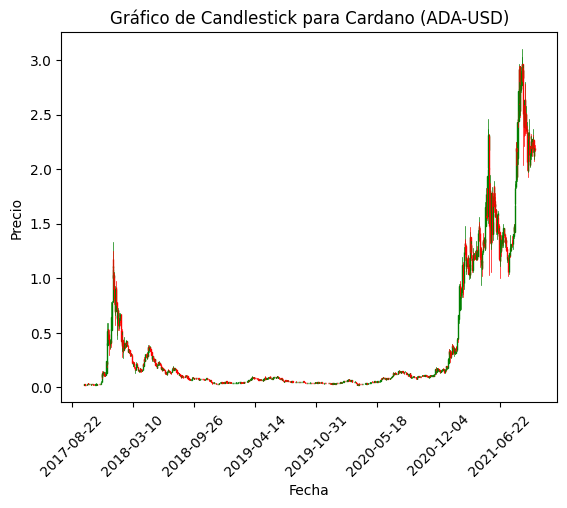

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

# Cargar los datos desde el archivo CSV
df = pd.read_csv('https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/ADA-USD.csv')

df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].apply(mdates.date2num)

# Crear un gráfico de candlestick
fig, ax = plt.subplots()
candlestick_ohlc(ax, df.values, width=0.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('Gráfico de Candlestick para Cardano (ADA-USD)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()


In [4]:
# Resumen estadístico
print(df.describe())


               Date         Open         High          Low        Close  \
count   1475.000000  1471.000000  1471.000000  1471.000000  1471.000000   
mean   18177.000000     0.374234     0.393359     0.354385     0.375726   
std      425.940137     0.609602     0.639195     0.578952     0.611501   
min    17440.000000     0.018414     0.021050     0.017354     0.018539   
25%    17808.500000     0.047560     0.049503     0.046073     0.047592   
50%    18177.000000     0.093398     0.096776     0.090105     0.093434   
75%    18545.500000     0.301339     0.318211     0.283567     0.301889   
max    18914.000000     2.966390     3.099186     2.907606     2.968239   

         Adj Close        Volume  
count  1471.000000  1.471000e+03  
mean      0.375726  1.090947e+09  
std       0.611501  2.258370e+09  
min       0.018539  1.739460e+06  
25%       0.047592  5.366896e+07  
50%       0.093434  1.359691e+08  
75%       0.301889  6.999972e+08  
max       2.968239  1.914198e+10  


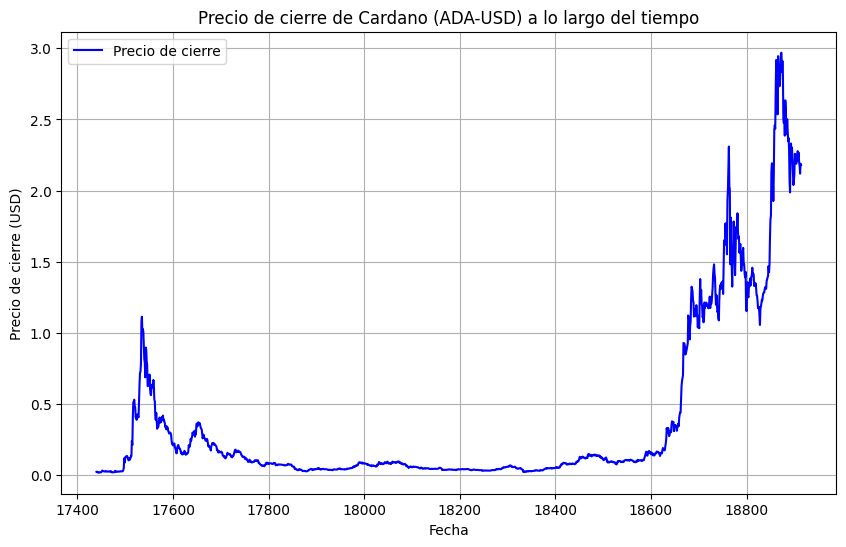

In [5]:
# Gráfico de la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Precio de cierre', color='blue')
plt.title('Precio de cierre de Cardano (ADA-USD) a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()


La gráfica muestra la evolución del precio de cierre de Cardano (ADA-USD) a lo largo del tiempo. Se observan dos momentos de aumento significativo en el valor de Cardano:

Al principio de la gráfica, hay un pico pronunciado donde el precio aumenta drásticamente antes de caer nuevamente.
Hacia el final de la gráfica, se observa otro aumento significativo en el precio. Aunque hay algunas fluctuaciones, el precio se mantiene en un nivel más alto que antes.

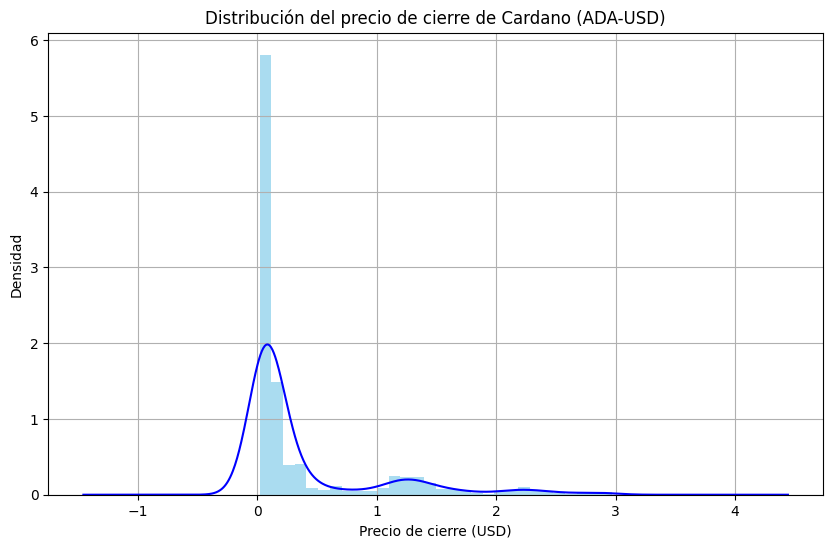

In [6]:
# Histograma y gráfico de densidad del precio de cierre
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=30, color='skyblue', alpha=0.7, density=True)
df['Close'].plot(kind='density', color='blue')
plt.title('Distribución del precio de cierre de Cardano (ADA-USD)')
plt.xlabel('Precio de cierre (USD)')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()


La gráfica muestra la distribución del precio de cierre de Cardano (ADA-USD). La densidad de los precios se representa en el eje Y y el precio de cierre en USD se muestra en el eje X.

Se observa un pico prominente en la densidad alrededor del precio 0, lo que indica que la mayoría de los precios de cierre están cerca de 0. Esto podría sugerir que, durante el período de tiempo representado en el gráfico, el precio de cierre de Cardano ha sido frecuentemente cercano a 0.